# II - Redes Densas

## Importar librerias

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Parametros de entrenamiento

In [3]:
lr = 1.0
epochs = 30
batch_size = 256
np.random.seed(14)

## Cargar y visualizar el dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.max(np.unique(y_train)) + 1

11501568/11490434 [==============================] - 9s 1us/step


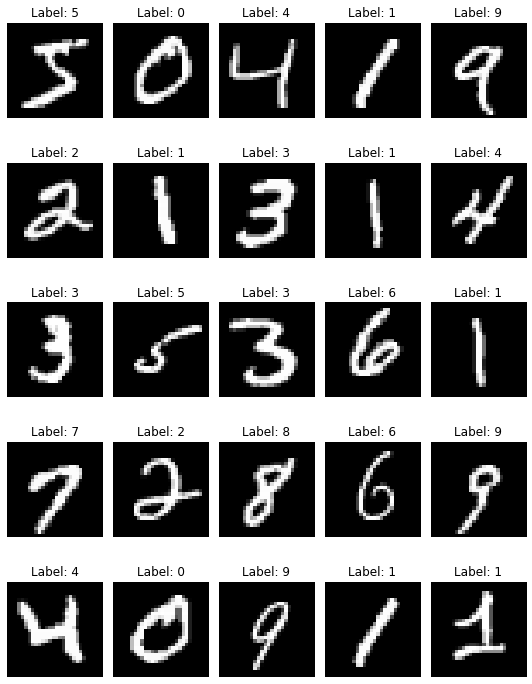

In [5]:
num = 25
images = x_train[:num]
labels = y_train[:num]
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preparacion de los datos

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

In [8]:
x_train.shape = (x_train.shape[0], np.prod(x_train.shape[1:]))
x_test.shape = (x_test.shape[0], np.prod(x_test.shape[1:]))

## Crear el modelo

In [9]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=x_train.shape[1:])
dense_1 = Dense(500, activation='relu') (input_layer)
# dropout_1 = Dropout(0.25) (dense_1) # ctrl + /
dense_2 = Dense(500, activation='relu') (dense_1)
# dropout_2 = Dropout(0.25) (dense_2)
dense_3 = Dense(100, activation='relu') (dense_2)
# dropout_3 = Dropout(0.25) (dense_3)
output_layer = Dense(n_classes, activation='softmax') (dense_3)
#---------------------------------------------------------------------#
model = Model(input_layer, output_layer)

In [10]:
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0     

## Entrenar el modelo

In [11]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/30
235/235 [==============================] - 6s 23ms/step - loss: 0.4205 - acc: 0.8690 - mse: 0.0188 - val_loss: 0.2120 - val_acc: 0.9325 - val_mse: 0.0098
Epoch 2/30
235/235 [==============================] - 5s 22ms/step - loss: 0.1585 - acc: 0.9526 - mse: 0.0072 - val_loss: 0.1031 - val_acc: 0.9693 - val_mse: 0.0047
Epoch 3/30
235/235 [==============================] - 5s 22ms/step - loss: 0.1138 - acc: 0.9659 - mse: 0.0053 - val_loss: 0.0966 - val_acc: 0.9703 - val_mse: 0.0045
Epoch 4/30
235/235 [==============================] - 5s 22ms/step - loss: 0.0921 - acc: 0.9724 - mse: 0.0043 - val_loss: 0.0795 - val_acc: 0.9757 - val_mse: 0.0037
Epoch 5/30
235/235 [==============================] - 5s 21ms/step - loss: 0.0745 - acc: 0.9772 - mse: 0.0035 - val_loss: 0.0667 - val_acc: 0.9805 - val_mse: 0.0030
Epoch 6/30
235/235 [==============================] - 6s 25ms/step - loss: 0.0629 - acc: 0.9807 - mse: 0.0029 - val_loss: 0.0619 - val_acc: 0.9819 - val_mse: 0.0029
Epoch 7/30

## Evaluar el proceso de entrenamiento

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'mse', 'val_loss', 'val_acc', 'val_mse'])

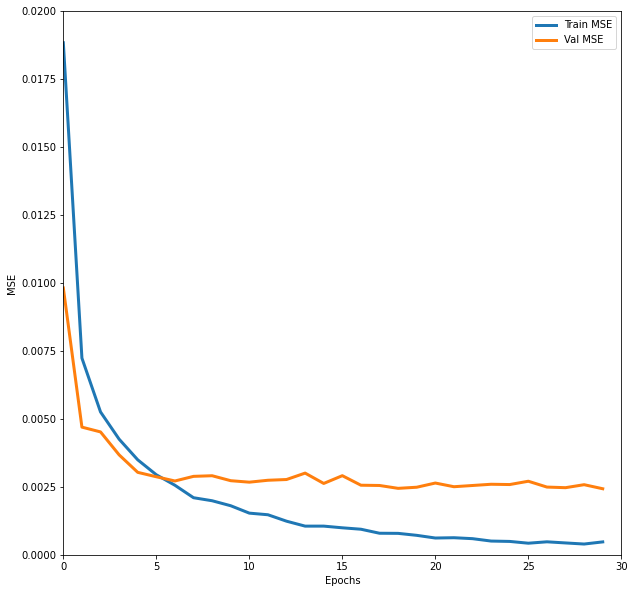

In [13]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['mse'], linewidth=3, label='Train MSE')
plt.plot(history.history['val_mse'], linewidth=3, label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, 30, 0, 0.02])
plt.legend(loc='upper right')
plt.show()

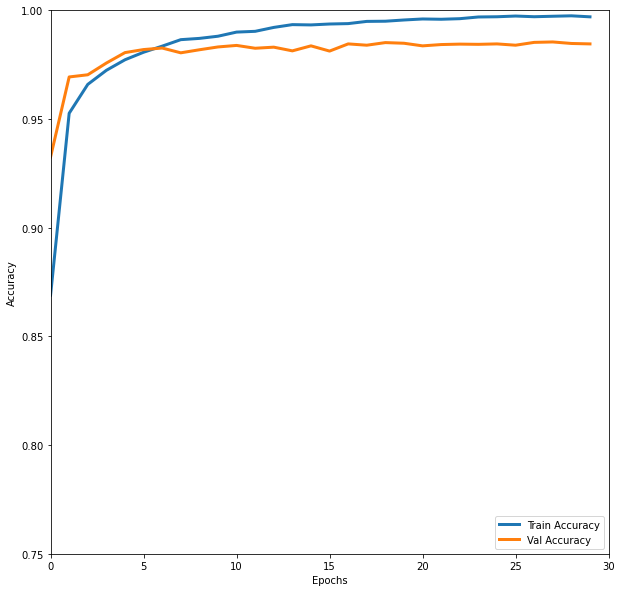

In [14]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 30, 0.75, 1])
plt.legend(loc='lower right')

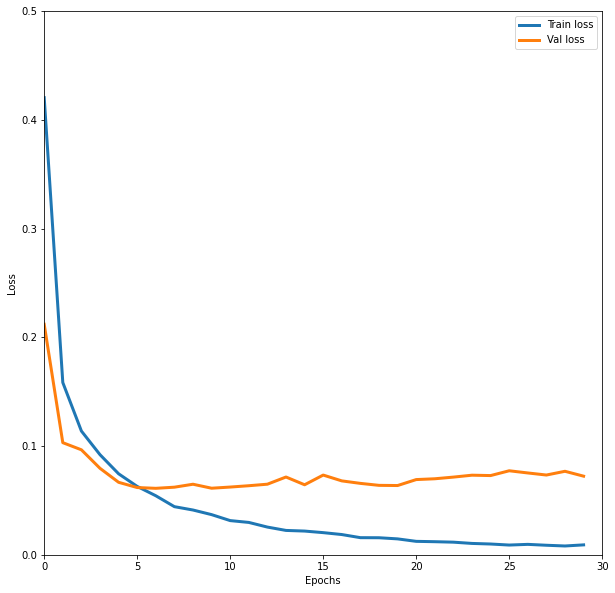

In [15]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], linewidth=3, label='Train loss')
plt.plot(history.history['val_loss'], linewidth=3, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 30, 0, 0.5])
plt.legend(loc='upper right')

## Predicciones sobre una imagen individual

In [16]:
x_single_test = x_train[0] # primera imagen del dataset, visualizada arriba
y_single_test = y_train[0] # primera etiqueta del dataset, visualizada arriba
x_single_test.shape = (1, x_single_test.shape[0])
y_single_test.shape = (1, y_single_test.shape[0])

In [17]:
model.predict(x_single_test, verbose=1)

1/1 [==============================] - 0s 101ms/step


array([[6.5485013e-20, 2.0056958e-17, 1.3582812e-18, 7.1888717e-05,
        7.4886932e-22, 9.9992812e-01, 1.2109652e-16, 1.4299703e-18,
        7.5543841e-18, 9.6130211e-13]], dtype=float32)

In [18]:
model.evaluate(x_single_test, y_single_test,verbose=1)

1/1 [==============================] - 0s 27ms/step - loss: 7.1881e-05 - acc: 1.0000 - mse: 1.0335e-09


[7.188061863416806e-05, 1.0, 1.0335182709653168e-09]